In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import collections
import numpy as np

In [38]:
df = pd.read_csv('sim_trace.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              77 non-null     int64  
 1   type            77 non-null     object 
 2   app             77 non-null     int64  
 3   module          77 non-null     object 
 4   message         77 non-null     object 
 5   DES.src         77 non-null     int64  
 6   DES.dst         77 non-null     int64  
 7   TOPO.src        77 non-null     int64  
 8   TOPO.dst        77 non-null     int64  
 9   module.src      77 non-null     object 
 10  service         77 non-null     float64
 11  time_in         77 non-null     float64
 12  time_out        77 non-null     float64
 13  time_emit       77 non-null     float64
 14  time_reception  77 non-null     float64
dtypes: float64(5), int64(6), object(4)
memory usage: 9.1+ KB


In [40]:
df["time_latency"] = df["time_reception"] - df["time_emit"]
df["time_wait"] = df["time_in"] - df["time_reception"]  
df["time_service"] = df["time_out"] - df["time_in"]
df["time_response"] = df["time_out"] - df["time_reception"]
df["time_total_response"] = df["time_response"] + df["time_latency"]

In [41]:
# convert index to date type in order to use resample and agreegate functions of pandas
df["date"]=df.time_in.astype('datetime64[s]')
df.index = df.date

In [42]:
df.head(60)

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,...,time_in,time_out,time_emit,time_reception,time_latency,time_wait,time_service,time_response,time_total_response,date
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:01:41,1,COMP_M,0,0_01,M.USER.APP.0,0,8,1,0,None,...,101.00002,101.15002,100.0,101.00002,1.00002,0.00,0.15,0.15,1.15002,1970-01-01 00:01:41
1970-01-01 00:01:41,4,COMP_M,0,0_01,M.USER.APP.0,3,8,4,0,None,...,101.15002,101.30002,100.0,101.00002,1.00002,0.15,0.15,0.30,1.30002,1970-01-01 00:01:41
1970-01-01 00:01:42,3,COMP_M,0,0_01,M.USER.APP.0,2,8,3,0,None,...,102.00004,102.15004,100.0,102.00004,2.00004,0.00,0.15,0.15,2.15004,1970-01-01 00:01:42
1970-01-01 00:01:42,5,COMP_M,0,0_01,M.USER.APP.0,4,8,5,0,None,...,102.15004,102.30004,100.0,102.00004,2.00004,0.15,0.15,0.30,2.30004,1970-01-01 00:01:42
1970-01-01 00:01:42,7,COMP_M,0,0_01,M.USER.APP.0,6,8,7,0,None,...,102.30004,102.45004,100.0,102.00004,2.00004,0.30,0.15,0.45,2.45004,1970-01-01 00:01:42
1970-01-01 00:01:43,6,COMP_M,0,0_01,M.USER.APP.0,5,8,6,0,None,...,103.00006,103.15006,100.0,103.00006,3.00006,0.00,0.15,0.15,3.15006,1970-01-01 00:01:43
1970-01-01 00:01:44,2,COMP_M,0,0_01,M.USER.APP.0,1,8,2,0,None,...,104.00008,104.15008,100.0,104.00008,4.00008,0.00,0.15,0.15,4.15008,1970-01-01 00:01:44
1970-01-01 00:03:21,8,COMP_M,0,0_01,M.USER.APP.0,0,8,1,0,None,...,201.00002,201.15002,200.0,201.00002,1.00002,0.00,0.15,0.15,1.15002,1970-01-01 00:03:21
1970-01-01 00:03:21,11,COMP_M,0,0_01,M.USER.APP.0,3,8,4,0,None,...,201.15002,201.30002,200.0,201.00002,1.00002,0.15,0.15,0.30,1.30002,1970-01-01 00:03:21


In [43]:
df_resample = df.resample('100s').agg(dict(time_latency='mean'))

In [44]:
df_resample.shape

(11, 1)

In [45]:
timeLatency = df_resample.time_latency.values

In [46]:
ticks = range(len(timeLatency))

Text(0, 0.5, 'Latency time')

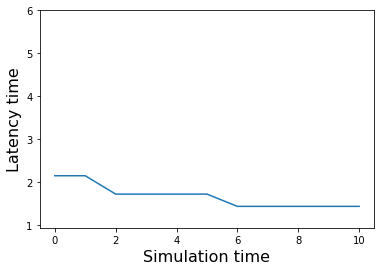

In [47]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ticks, timeLatency, '-')
ax1.set_ylim(timeLatency.min()-0.5,6)#timeLatency.max()+0.5)
ax1.set_xlabel("Simulation time", fontsize=16)
ax1.set_ylabel("Latency time", fontsize=16)

# Latency

In [48]:
df_resample = df.resample('100s').agg(dict(time_latency='mean'))

In [49]:
df_resample.shape

(11, 1)

In [50]:
timeLatency = df_resample.time_latency.values

In [51]:
ticks = range(len(timeLatency))

Text(0, 0.5, 'Latency time')

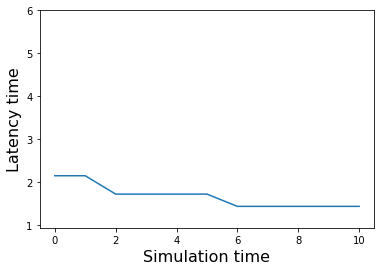

In [52]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ticks, timeLatency, '-')
ax1.set_ylim(timeLatency.min()-0.5,6)#timeLatency.max()+0.5)
ax1.set_xlabel("Simulation time", fontsize=16)
ax1.set_ylabel("Latency time", fontsize=16)

# Hop Count

In [53]:
# Hop count
cache_distance = {}

In [54]:
G = nx.read_graphml('graph.graphml')

In [55]:
print(G.nodes())

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']


In [56]:
def compute_distance(k):
    return nx.shortest_path_length(G,str(k[0]),str(k[1]))

In [57]:
for row in df[["TOPO.src","TOPO.dst"]].iterrows():
    k = (row[1][0],row[1][1])
    if not k in cache_distance.keys():
        cache_distance[k] = compute_distance(k)

In [58]:
x = cache_distance.values() 
counter = collections.Counter(x)
print(counter)

Counter({2: 5, 1: 4, 3: 2})


In [59]:
data_a = {}
for k in range(4):
    data_a[k] = counter[k]

In [60]:
data_a

{0: 0, 1: 4, 2: 5, 3: 2}

In [61]:
data_a = data_a.values()

In [62]:
ticks = range(4)

In [63]:
N = len(ticks)
ind = np.array(ticks)
width = 0.45

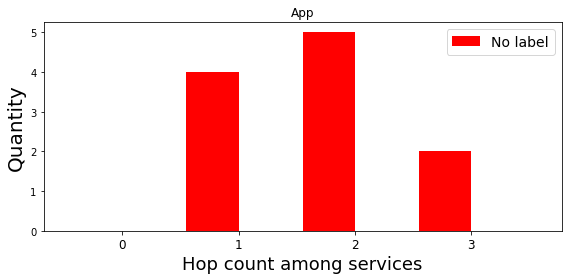

In [64]:
fig, ax = plt.subplots(figsize=(8.0,4.0))
ax.get_xaxis().set_ticks(range(0, len(ticks) * 2, 2))
r = ax.bar(ind, data_a, width, color='r')
ax.set_xticks(ind+ width/2)
ax.set_xticklabels(ticks, fontsize=12)
ax.set_title("App")
ax.set_xlim(-width, len(ticks))
ax.plot([], c='#a6bddb', label="No LABEL",linewidth=3)
ax.set_xlabel("Hop count among services", fontsize=18)
ax.set_ylabel("Quantity", fontsize=20)
plt.legend([r],['No label'],loc="upper right",fontsize=14)
plt.tight_layout()

In [65]:
df_link = pd.read_csv('sim_trace_link.csv')

In [66]:
df_link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       124 non-null    int64  
 1   type     124 non-null    object 
 2   src      124 non-null    int64  
 3   dst      124 non-null    int64  
 4   app      124 non-null    int64  
 5   latency  124 non-null    float64
 6   message  124 non-null    object 
 7   ctime    124 non-null    float64
 8   size     124 non-null    int64  
 9   buffer   124 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 9.8+ KB


In [67]:
df_link.head(50)

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,1,0,0,1.00002,M.USER.APP.0,100.00000,20,0
1,2,LINK,2,5,0,1.00002,M.USER.APP.0,100.00000,20,1
2,3,LINK,3,13,0,1.00002,M.USER.APP.0,100.00000,20,2
3,4,LINK,4,0,0,1.00002,M.USER.APP.0,100.00000,20,3
4,5,LINK,5,1,0,1.00002,M.USER.APP.0,100.00000,20,4
5,6,LINK,6,1,0,1.00002,M.USER.APP.0,100.00000,20,5
6,7,LINK,7,4,0,1.00002,M.USER.APP.0,100.00000,20,6
7,2,LINK,5,1,0,1.00002,M.USER.APP.0,101.00002,20,0
8,3,LINK,13,0,0,1.00002,M.USER.APP.0,101.00002,20,1
9,5,LINK,1,0,0,1.00002,M.USER.APP.0,101.00002,20,2


In [68]:
total_messages = len(df_link)
print(f'total messages transmited = {total_messages}')

total messages transmited = 124


In [69]:
bytes_transmited = df_link["size"].sum()
print(f'total bytes transmited = {bytes_transmited}')

total bytes transmited = 2480


In [70]:
def utilization(id_entity, total_time, from_time=0.0):
        if "time_service" not in df.columns: #cached
            df["time_service"] = df.time_out - df.time_in
        values = df.groupby("DES.dst").time_service.agg("sum")
        return values[id_entity] / total_time

In [71]:
values = df.groupby("DES.dst").time_service.agg("sum")

In [72]:
values

DES.dst
8     9.1500
10    0.6000
11    0.2500
12    0.0375
Name: time_service, dtype: float64